# Yelp Data Challenge - NLP

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


### Define your feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = [t for i,t in enumerate(df.text)]

In [7]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
len(documents)

277219

### Define the target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

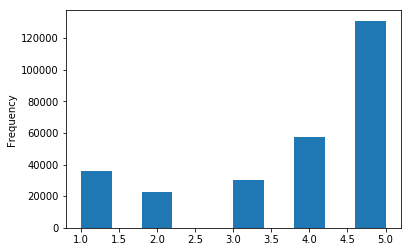

In [22]:
# Make a column and take the values, save to a variable named "target"
df.target = df.stars
import numpy as np
np.median(df.target)
import matplotlib.pyplot as plt

df.target.plot.hist()
plt.show()

#### You may want to look at the statistic of the target variable

## Let's create training dataset and test dataset

In [25]:
# To be implemented
df.target = df.stars.apply(lambda x: 1 if x > 4 else 0)
df.target.describe()

count    277219.00000
mean          0.47206
std           0.49922
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max           1.00000
Name: stars, dtype: float64

In [26]:
from sklearn.cross_validation import train_test_split

/Users/jessie/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(
     documents, df.target, test_size=0.33, random_state=42)

## Let's get NLP representation of the documents

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=5000)

In [37]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train)

In [38]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [34]:
# Use the trained model to transform your test data
vectors_test = vectorizer.transform(documents_test).toarray()

## Similar review search engine

In [88]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return  [labels[i] for i in np.argsort(lst)[::1][:n]] 


In [36]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
# Draw an arbitrary review from test (unseen in training) documents
doc_test = documents_test[np.random.randint(len(documents_test), size=1)]

/Users/jessie/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


In [50]:
# Transform the drawn review(s) to vector(s)
doc_test_vector = vectorizer.transform([doc_test]).toarray()

In [51]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(doc_test_vector, vectors_train.toarray())

In [61]:
# Let's find top 5 similar reviews
n = 5
#np.shape(similarity_scores[0])
searched_result = get_top_values(similarity_scores[0], n, documents_train)

In [63]:
print ('Our search query:')
print (doc_test)

Our search query:
Had to come check this place out, I'd never had a fresh White Castle burger and I was not disappointed. I got the 4 cheeseburgers with fries and a drink, it tasted fresh and was nice and hot. The onions were a tasty addition and even though I could only finish three of the burgers and half the fries, it was really tasty! Would definitely go back.


In [64]:
print ('Most %s similar reviews:' % n)
print  (searched_result)

Most 5 similar reviews:
["After walking up and down the Strip twice I was craving some White Castle almost as much as Roldy and Kumar!\n\nFrom the outside it looked like a tiny standalone but actually the location is inside the Casino Royale.\n\nGot the #7 Castle Pack, which was 10 sliders, two regular fries and two drinks.\n\nService was good as they got my order out quickly in spite of the place being packed but for my first time eating White Castle burgers at a White Castle I was rather disappointed. \n\nThese certainly did not hit the spot! I know sliders don't have much meat but these were practically meatless! And the onions could've tasted a whole lot better. The Fries were meh too as they were a bit soggy.\n\nNot gonna lie, I enjoyed the microwave White Castle burgers you get from the grocery better...", 'After a night of dancing, my friends and I went to White Castle. No regrets.\n\nI have had White Castle burgers in the past. From the freezer section at the supermarket. I hav

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [65]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

nbf = MultinomialNB()
nbf.fit(vectors_train.toarray(),target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
# Get score for training set
nbf.score(vectors_train.toarray(),target_train)

0.81235194038850844

In [68]:
# Get score for test set
nbf.score(vectors_test,target_test)

0.80715542778439708

#### Logistic Regression Classifier

In [69]:
# Build a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
vectors_train = vectors_train.toarray()

lg = LogisticRegression()
lg.fit(vectors_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
# Get score for training set
lg.score(vectors_train,target_train)

0.84339061894301592

In [71]:
# Get score for test set
lg.score(vectors_test,target_test)

0.83342260310658811

#### Q: What are the key features(words) that make the positive prediction?

In [86]:
# Let's find it out by ranking
n = 20
get_top_values(lg.coef_[0],n, words)

['worst',
 'horrible',
 'ok',
 'bland',
 'amazing',
 'mediocre',
 'disappointing',
 'rude',
 'best',
 'terrible',
 'okay',
 'slow',
 'lacked',
 'average',
 'poor',
 'lacking',
 'overpriced',
 'meh',
 'poisoning',
 'tasteless']

A: (insert your comments here)

#### Q: What are the key features(words) that make the negative prediction?

In [90]:
# Let's find it out by ranking
n = 20
get_bottom_values(lg.coef_[0], n, words)

['worst',
 'horrible',
 'ok',
 'bland',
 'mediocre',
 'disappointing',
 'rude',
 'terrible',
 'okay',
 'slow',
 'lacked',
 'average',
 'poor',
 'lacking',
 'overpriced',
 'meh',
 'poisoning',
 'tasteless',
 'alright',
 'unfortunately']

A: (insert your comments here)

#### Random Forest Classifier

In [91]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 5, min_samples_leaf = 20, n_jobs = -1)
rfc.fit(vectors_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
# Get score for training set
rfc.score(vectors_train,target_train)

0.80161627255890078

In [93]:
# Get score for test set
rfc.score(vectors_test,target_test)

0.77830853819835377

#### Q: What do you see from the training score and the test score?

A: The number of estimators is not enough and the prediction score is even less than logistic regression. If we increase the number of estimators, the training time may be much longer but the result is expected to be improved. The test score is lower than the training score, this means that our model doesn't have overfitting problem yet.

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [94]:
n = 20
get_top_values(rfc.feature_importances_,n,words)

['amazing',
 'delicious',
 'like',
 'best',
 'great',
 'asked',
 'awesome',
 'bad',
 'vegas',
 'decent',
 'didn',
 'worst',
 'okay',
 'love',
 'ok',
 'order',
 'bland',
 'rude',
 'definitely',
 'dry']

## TODO: Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [95]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lg,
                            vectors_train,
                            target_train,
                            cv = 5,
                            scoring="accuracy")
cv_scores

## TODO: Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [ ]:
# To be implemented
